Efeito-Fotoeletrico
# [Link in GitHub](https://github.com/bernardocarvalho/python-basics)

## Lab Efeito Fotoelectrico
![](https://drive.google.com/uc?export=view&id=1n3Hqb9uN1VjAjlRTn1j8wTrpMMGEKGvG).  


$e \cdot V_s = K_{e,max} = h \nu - W$,   

$ e = 1.6 \cdot 10^{-19} C$.  

$ c = 3.0 \cdot 10^{8} m s^{-1}$.  

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# String descritivo das unidates do Cesp
#UNITCesp = 'kJ kg\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}ºC\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}'
# Constantes
C = 3.0e8 # (m/s) Velocidade da Luz
E = 1.9e-19 # (C) carga do eletrão
plt.close("all")

In [44]:
# @title Valores Tabelados do c.d.o (nm) das riscas principais do Mercúrio
# Cor: amarelo, verde , azul , violeta , ultra-violeta
cdo = np.array([578, 546, 436, 405, 365]) * 1e-9
freq = C / cdo

Text(0.5, 1.0, 'Tensao de Paragem')

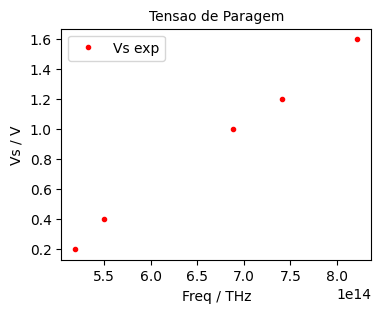

In [24]:
# @title Valores Experimentais e Gráfico
Vs =  np.array([0.20, 0.40, 1.00, 1.20, 1.60])
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(freq, Vs, '.', color='red', label='Vs exp')
#plt.plot(x, y2, '-', color='blue', label='T2 (água)')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
plt.title("Tensao de Paragem", fontsize=10)

Text(0.5, 1.0, 'Tensao de Paragem')

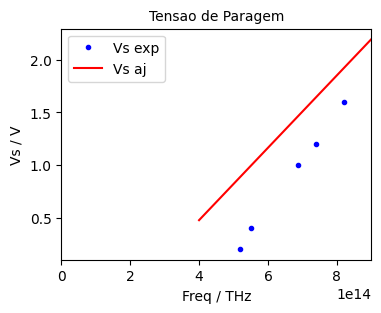

In [25]:
# @title Ajuste Manual
#m1 = 0.050 # @param {type:"number"}
m = 3.44e-15 # @param {type:"slider", min:1e-15, max:6e-15, step:1e-17}
wo = -0.9 # @param {type:"slider", min:-2, max:0, step:0.1}

flimit= np.array([4, 9]) * 1e14
# flimit= freq[np.array([0, -1])]
Vs_aj = m * flimit + wo
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(freq, Vs, '.', color='blue', label='Vs exp')
plt.plot(flimit, Vs_aj, '-', color='red', label='Vs aj')
#plt.plot(x, y2, '-', color='blue', label='T2 (água)')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
axes = plt.gca()
axes.set_xlim([0, 9.0e14])
plt.title("Tensao de Paragem", fontsize=10)


Text(0.5, 1.0, 'Tensao de Paragem, Ajuste')

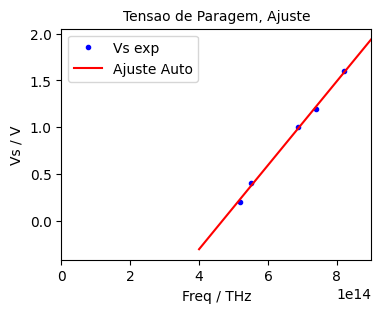

In [26]:
# @title Ajuste Automático
# Ref: Ifan Hughes, Thomas Hase "Measurements and their uncertainties", Pag 64
def ajuste_FE(f, V):
  N = len(f)
  Delta = N *  np.square(f).sum() -  f.sum()**2
  m = (N * (f*V).sum() - f.sum() * V.sum()) / Delta
  c = ( np.square(f).sum() * V.sum() - f.sum() * (f*V).sum() ) / Delta
  return m, c


m_aj, c_aj = ajuste_FE(freq, Vs)
flimit= np.array([4, 9]) * 1e14
# flimit= freq[np.array([0, -1])]
Vs_aj = m_aj * flimit + c_aj
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(freq, Vs, '.', color='blue', label='Vs exp')
plt.plot(flimit, Vs_aj, '-', color='red', label='Ajuste Auto')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
axes = plt.gca()
axes.set_xlim([0, 9.0e14])
plt.title("Tensao de Paragem, Ajuste", fontsize=10)



In [40]:
# @title Extrair dados do folha Google
dados = pd.read_csv('https://docs.google.com/spreadsheets/d/' +
                   '1fq0JQ2QpO49Mfu7TiMHrkqPVPtJfurtDW0XnWLzs8Ro' +
                   '/export?format=csv',
                   header=1)
                    #header=[0, 1])

In [28]:
dados.columns

Index(['Carimbo de data/hora', 'Nome', 'E-mail', 'Turno', 'Bancada',
       'Tensão de paragem sem filtro (volts)', '±',
       'Tensão de paragem com filtro (volts)', '±.1',
       'Comentários e sugestões', 'Tensão de paragem sem filtro (volts).1',
       '±.2', 'Tensão de paragem com filtro (volts).1', '±.3',
       'Comentários e sugestões.1', 'Tensão de paragem (volts)', '±.4',
       'Comentários e sugestões.2', 'Tensão de paragem (volts).1', '±.5',
       'Comentários e sugestões.3', 'Tensão de paragem (volts).2', '±.6',
       'Comentários e sugestões.4'],
      dtype='object')

In [41]:
# @title Selecionar Bancada
Banc = 'B'
tensaoAmarelo = dados.loc[dados['Bancada'] == Banc,'Tensão de paragem com filtro (volts)']
tensaoVerde  = dados.loc[dados['Bancada'] == Banc,'Tensão de paragem com filtro (volts).1']
tensaoAzul = dados.loc[dados['Bancada'] == Banc,'Tensão de paragem (volts)']
tensaoVioleta = dados.loc[dados['Bancada'] == Banc,'Tensão de paragem (volts).1']
tensaoUV  = dados.loc[dados['Bancada'] == Banc,'Tensão de paragem (volts).2']

In [55]:
tensaoPar = np.zeros(5)
dPtensaoPar = tensaoPar
tensaoPar[0] = tensaoAmarelo.mean()
dPtensaoPar[0] = tensaoAmarelo.std()

tensaoPar[1] = tensaoVerde.mean()
dPtensaoPar[1] = tensaoVerde.std()
tensaoPar[2] = tensaoAzul.mean()
dPtensaoPar[2] = tensaoAzul.std()
tensaoPar[3] = tensaoVioleta.mean()
dPtensaoPar[3] = tensaoVioleta.std()
tensaoPar[4] = tensaoUV.mean()
dPtensaoPar[4] = tensaoUV.std()
Nensaios = dados['Bancada'].count()
tensaoParError = dPtensaoPar / np.sqrt(Nensaios)


Declive 3.872e-16 V s. Ordenada org. Wo= -0.135 V


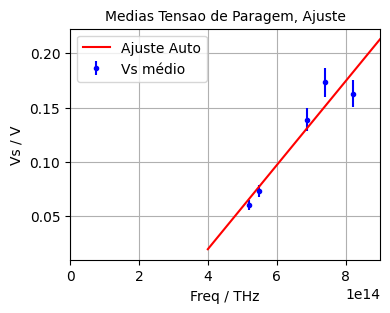

In [60]:
# @title Ajuste e Grafico dos valores médios
m2_aj, c2_aj = ajuste_FE(freq, tensaoPar)
Vs_aj2 = m2_aj * flimit + c2_aj
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.errorbar(freq, tensaoPar, tensaoParError,  fmt='.', color='blue', label='Vs médio')
plt.plot(flimit, Vs_aj2, '-', color='red', label='Ajuste Auto')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
plt.grid()
axes = plt.gca()
axes.set_xlim([0, 9.0e14])

plt.title("Medias Tensao de Paragem, Ajuste", fontsize=10)
print(f'Declive {m2_aj:.3e} V s. Ordenada org. Wo= {c2_aj:.3f} V')


<Axes: >

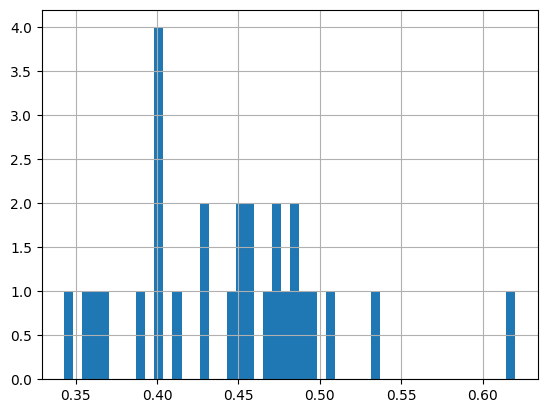

In [43]:
# @title Histograma das tensões de paragem
tensaoAmarelo.hist(bins=50)